# Visual CNN

----

visualize what CNN sees inside the model

In [2]:
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sinar.utils import fill_square

In [1]:
from pathlib import Path
import random

In [3]:
import cv2
def draw_bounding_boxes(image, label_file):
    bounding_boxes = []
    with label_file.open("r") as f:
        for line in f:
            cls, x, y, w, h = map(float, line.strip().split())
            h, w = h * image.shape[0], w * image.shape[1]
            x, y = x * image.shape[1], y * image.shape[0]
            x1, y1 = int(x - w / 2), int(y - h / 2)
            x2, y2 = int(x + w / 2), int(y + h / 2)
            bounding_boxes.append(((x1, y1), (x2, y2)))
    # draw bounding boxes
    for (x1, y1), (x2, y2) in bounding_boxes:
        image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

In [4]:
# visualize image data
data_dir = Path(rf"G:\My Drive\dataset\all-data-fix\train")



In [13]:
file_list = list((data_dir / "images").glob("*.jpg"))
random.shuffle(file_list)

images = []  # select only images with the same aspect ratio

aspect_ratio = 0

for file in file_list:
    img = cv2.imread(str(file))
    h, w, _ = img.shape
    if aspect_ratio == 0:
        aspect_ratio = h / w
    if h / w == aspect_ratio:
        images.append(file)
        print(file)
    if len(images) == 9:
        break
        

G:\My Drive\dataset\all-data-fix\train\images\frame-n9-054.jpg
G:\My Drive\dataset\all-data-fix\train\images\frame-n6-025.jpg
G:\My Drive\dataset\all-data-fix\train\images\normal-5--frame-n5-027.jpg
G:\My Drive\dataset\all-data-fix\train\images\frame-n9-100.jpg
G:\My Drive\dataset\all-data-fix\train\images\frame-n6-108.jpg
G:\My Drive\dataset\all-data-fix\train\images\frame-n9-091.jpg
G:\My Drive\dataset\all-data-fix\train\images\frame-n6-047.jpg
G:\My Drive\dataset\all-data-fix\train\images\frame-n9-080.jpg
G:\My Drive\dataset\all-data-fix\train\images\frame-n6-078.jpg


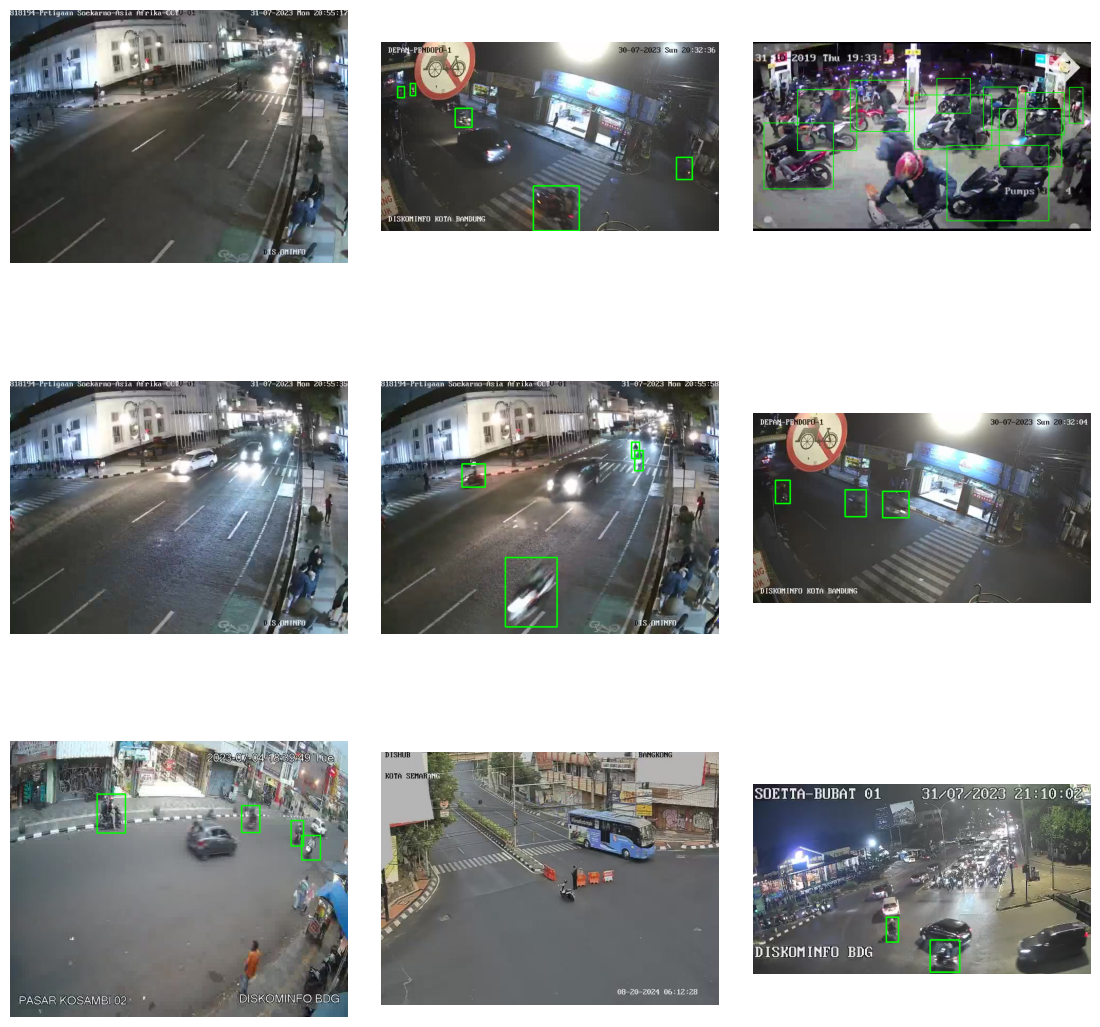

In [23]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

images = random.sample(list((data_dir / "images").glob("*.jpg")), 9)
for i, image_path in enumerate(images):
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label_file = data_dir / "labels" / (image_path.stem + ".txt")
    image = draw_bounding_boxes(image, label_file)
    axes[i // 3, i % 3].imshow(image)
    axes[i // 3, i % 3].axis("off")
    axes[i // 3, i % 3].set_aspect('equal')  # Ensures uniformity in aspect ratio

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, hspace=0.1, wspace=0.1)
plt.show()

In [15]:
fig.savefig("bounding_boxes_0.png", bbox_inches="tight", dpi=300, pad_inches=0)

In [2]:
model = tf.keras.models.load_model(rf"H:\My Drive\runs\documentations\CNN1-set-D35\best.keras")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1CLONE             │ (None, 30, 30, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 15, 30, 16)     │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 15, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,029 (82.15 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,020 (54.77 KB)

In [5]:
model.layers[1].get_weights()[0].shape   

(2, 1, 1, 16)

In [6]:
# set tensorflow seed for reproducibility
tf.random.set_seed(42)

inp = tf.keras.layers.Input((30, 30))
x = tf.keras.layers.Reshape((30, 30, 1))(inp)

conv1 = tf.keras.layers.Conv2D(16, kernel_size=(1,2), strides=(1,2))(x)
conv1 = tf.keras.layers.Activation('relu')(conv1)

conv2 = tf.keras.layers.Conv2D(16, kernel_size=(2,1), strides=(2,1))(conv1)
conv2 = tf.keras.layers.Activation('relu')(conv2)
conv2 = tf.keras.layers.Dropout(0.25)(conv2)

conv3 = tf.keras.layers.Conv2D(16, kernel_size=5, strides=1)(conv2)
conv3 = tf.keras.layers.Activation('relu')(conv3)

full = tf.keras.layers.GlobalAveragePooling2D()(conv3)

full = tf.keras.layers.Dropout(0.25)(full)

out = tf.keras.layers.Dense(1, activation='sigmoid')(full)

cnn4 = tf.keras.models.Model(inputs=inp, outputs=out)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn4.compile(loss="binary_crossentropy",
                optimizer=optimizer,
                metrics=['accuracy'])
cnn4.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 30)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 30, 30, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 15, 16)     │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 30, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
tf.keras.backend.clear_session()

In [22]:
tf.keras.backend.clear_session()

inp = tf.keras.layers.Input((30, 30))
x = tf.keras.layers.Reshape((30, 30, 1))(inp)

# Conv layer 1 with L2 regularization
conv1 = tf.keras.layers.Conv2D(1, kernel_size=(1,2), strides=(1,2))(x)
conv1 = tf.keras.layers.Activation('relu')(conv1)

# switch rows to columns
conv1 = tf.keras.layers.Permute((2, 1, 3))(conv1)
conv1 = tf.keras.layers.Reshape((15, 30))(conv1)

# split rows and apply conv1d for each row and reshape back
feats = tf.keras.layers.Lambda(lambda x: tf.unstack(x, axis=1))(conv1)
features = []
dense = tf.keras.layers.Dense(1, activation="relu")
for i in range(15):
    conv1d = dense(feats[i])
    features.append(conv1d)
concat = tf.keras.layers.Concatenate(axis=1)(features)
output = tf.keras.layers.Dense(1, activation="sigmoid")(concat)

model = tf.keras.models.Model(inputs=inp, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 30, 30)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 30, 30, 1) │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 30, 15, 1) │          3 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 30, 15, 1) │          0 │ conv2d[0][0]      │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ permute (Permute)   │ (None, 15, 30, 1) │          0 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 15, 30)    │          0 │ permute[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ [(None, 30),      │          0 │ reshape_1[0][0]   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30),       │            │                   │
│                     │ (None, 30)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         31 │ lambda[0][0],     │
│                     │                   │            │ lambda[0][1],     │
│                     │                   │            │ lambda[0][2],     │
│                     │                   │            │ lambda[0][3],     │
│                     │                   │            │ lambda[0][4],     │
│                     │                   │            │ lambda[0][5],     │
│                     │                   │            │ lambda[0][6],     │
│                     │                   │            │ lambda[0][7],     │
│                     │                   │            │ lambda[0][8],     │
│                     │                   │            │ lambda[0][9],     │
│                     │                   │            │ lambda[0][10],    │
│                     │                   │            │ lambda[0][11],    │
│                     │                   │            │ lambda[0][12],    │
│                     │                   │            │ lambda[0][13],    │
│                     │                   │            │ lambda[0][14]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 15)        │          0 │ dense[0][0],      │
│ (Concatenate)       │                   │            │ dense[1][0],      │
│                     │                   │            │ dense[2][0],    

 Total params: 50 (200.00 B)

 Trainable params: 50 (200.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
from keras import ops
x = ops.zeros([1, 30, 30])
x

In [12]:
from sinar.utils import flatten_matrix
flatten_matrix(np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12], [13,14,15,16]]))

array([ 1,  2,  5,  6,  9, 10, 13, 14,  3,  4,  7,  8, 11, 12, 15, 16])

In [27]:
from keras import ops

@tf.keras.utils.register_keras_serializable(package="Sinar")
class SpecialFlatten(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(SpecialFlatten, self).__init__(**kwargs)
        self.trainable = False
    
    def _flatten(self, m):
        # Transpose the matrix first
        m_transposed = tf.transpose(m)  # Shape: (num_columns, num_rows)

        # Create an interleaved list of indices for the flattened output
        rows = ops.shape(m_transposed)[0]
        cols = ops.shape(m_transposed)[1]

        idx_pairs = []
        for i in range(0, rows, 2):
            for j in range(cols):
                idx_pairs.append([i, j])
                idx_pairs.append([i+1, j])

        # Gather the values using the interleaved indices
        flattened = tf.gather_nd(m_transposed, idx_pairs)
        return flattened

    def call(self, inputs):
        # Get dynamic shape
        input_shape = tf.shape(inputs)

        # Check if the input is batched or not
        if len(inputs.shape) == 3:  # Batched case

            # Use tf.map_fn to process each element in the batch
            batch_flattened = ops.vectorized_map(self._flatten, inputs)
            return batch_flattened
        else:  # Non-batched case
            return self._flatten(inputs)
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1] * input_shape[2])
        

model = tf.keras.models.Sequential([
    tf.keras.layers.Input((30, 30)),
    SpecialFlatten(),
])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ special_flatten_13              │ (None, 900)            │             0 │
│ (SpecialFlatten)                │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.save("special-flatten.keras")

In [29]:
# simulate training with dynamic batch size
model = tf.keras.Sequential([
    tf.keras.layers.Input((30, 30)),
    SpecialFlatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

model.fit(np.random.rand(100, 30, 30), np.random.randint(0, 2, 100), batch_size=10, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4611 - loss: 0.7625 
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5295 - loss: 0.7184
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5545 - loss: 0.7092
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6211 - loss: 0.6627
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4985 - loss: 0.6881
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5419 - loss: 0.6840
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6043 - loss: 0.6546
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 0.6258
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7270 - loss: 0.5957
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8217 - loss: 0.5664 


In [28]:
x = np.random.randint(0, 15, (1, 30, 30))
default_flatten = flatten_matrix(x)
res = model(x).numpy()
np.alltrue(default_flatten == res)

True

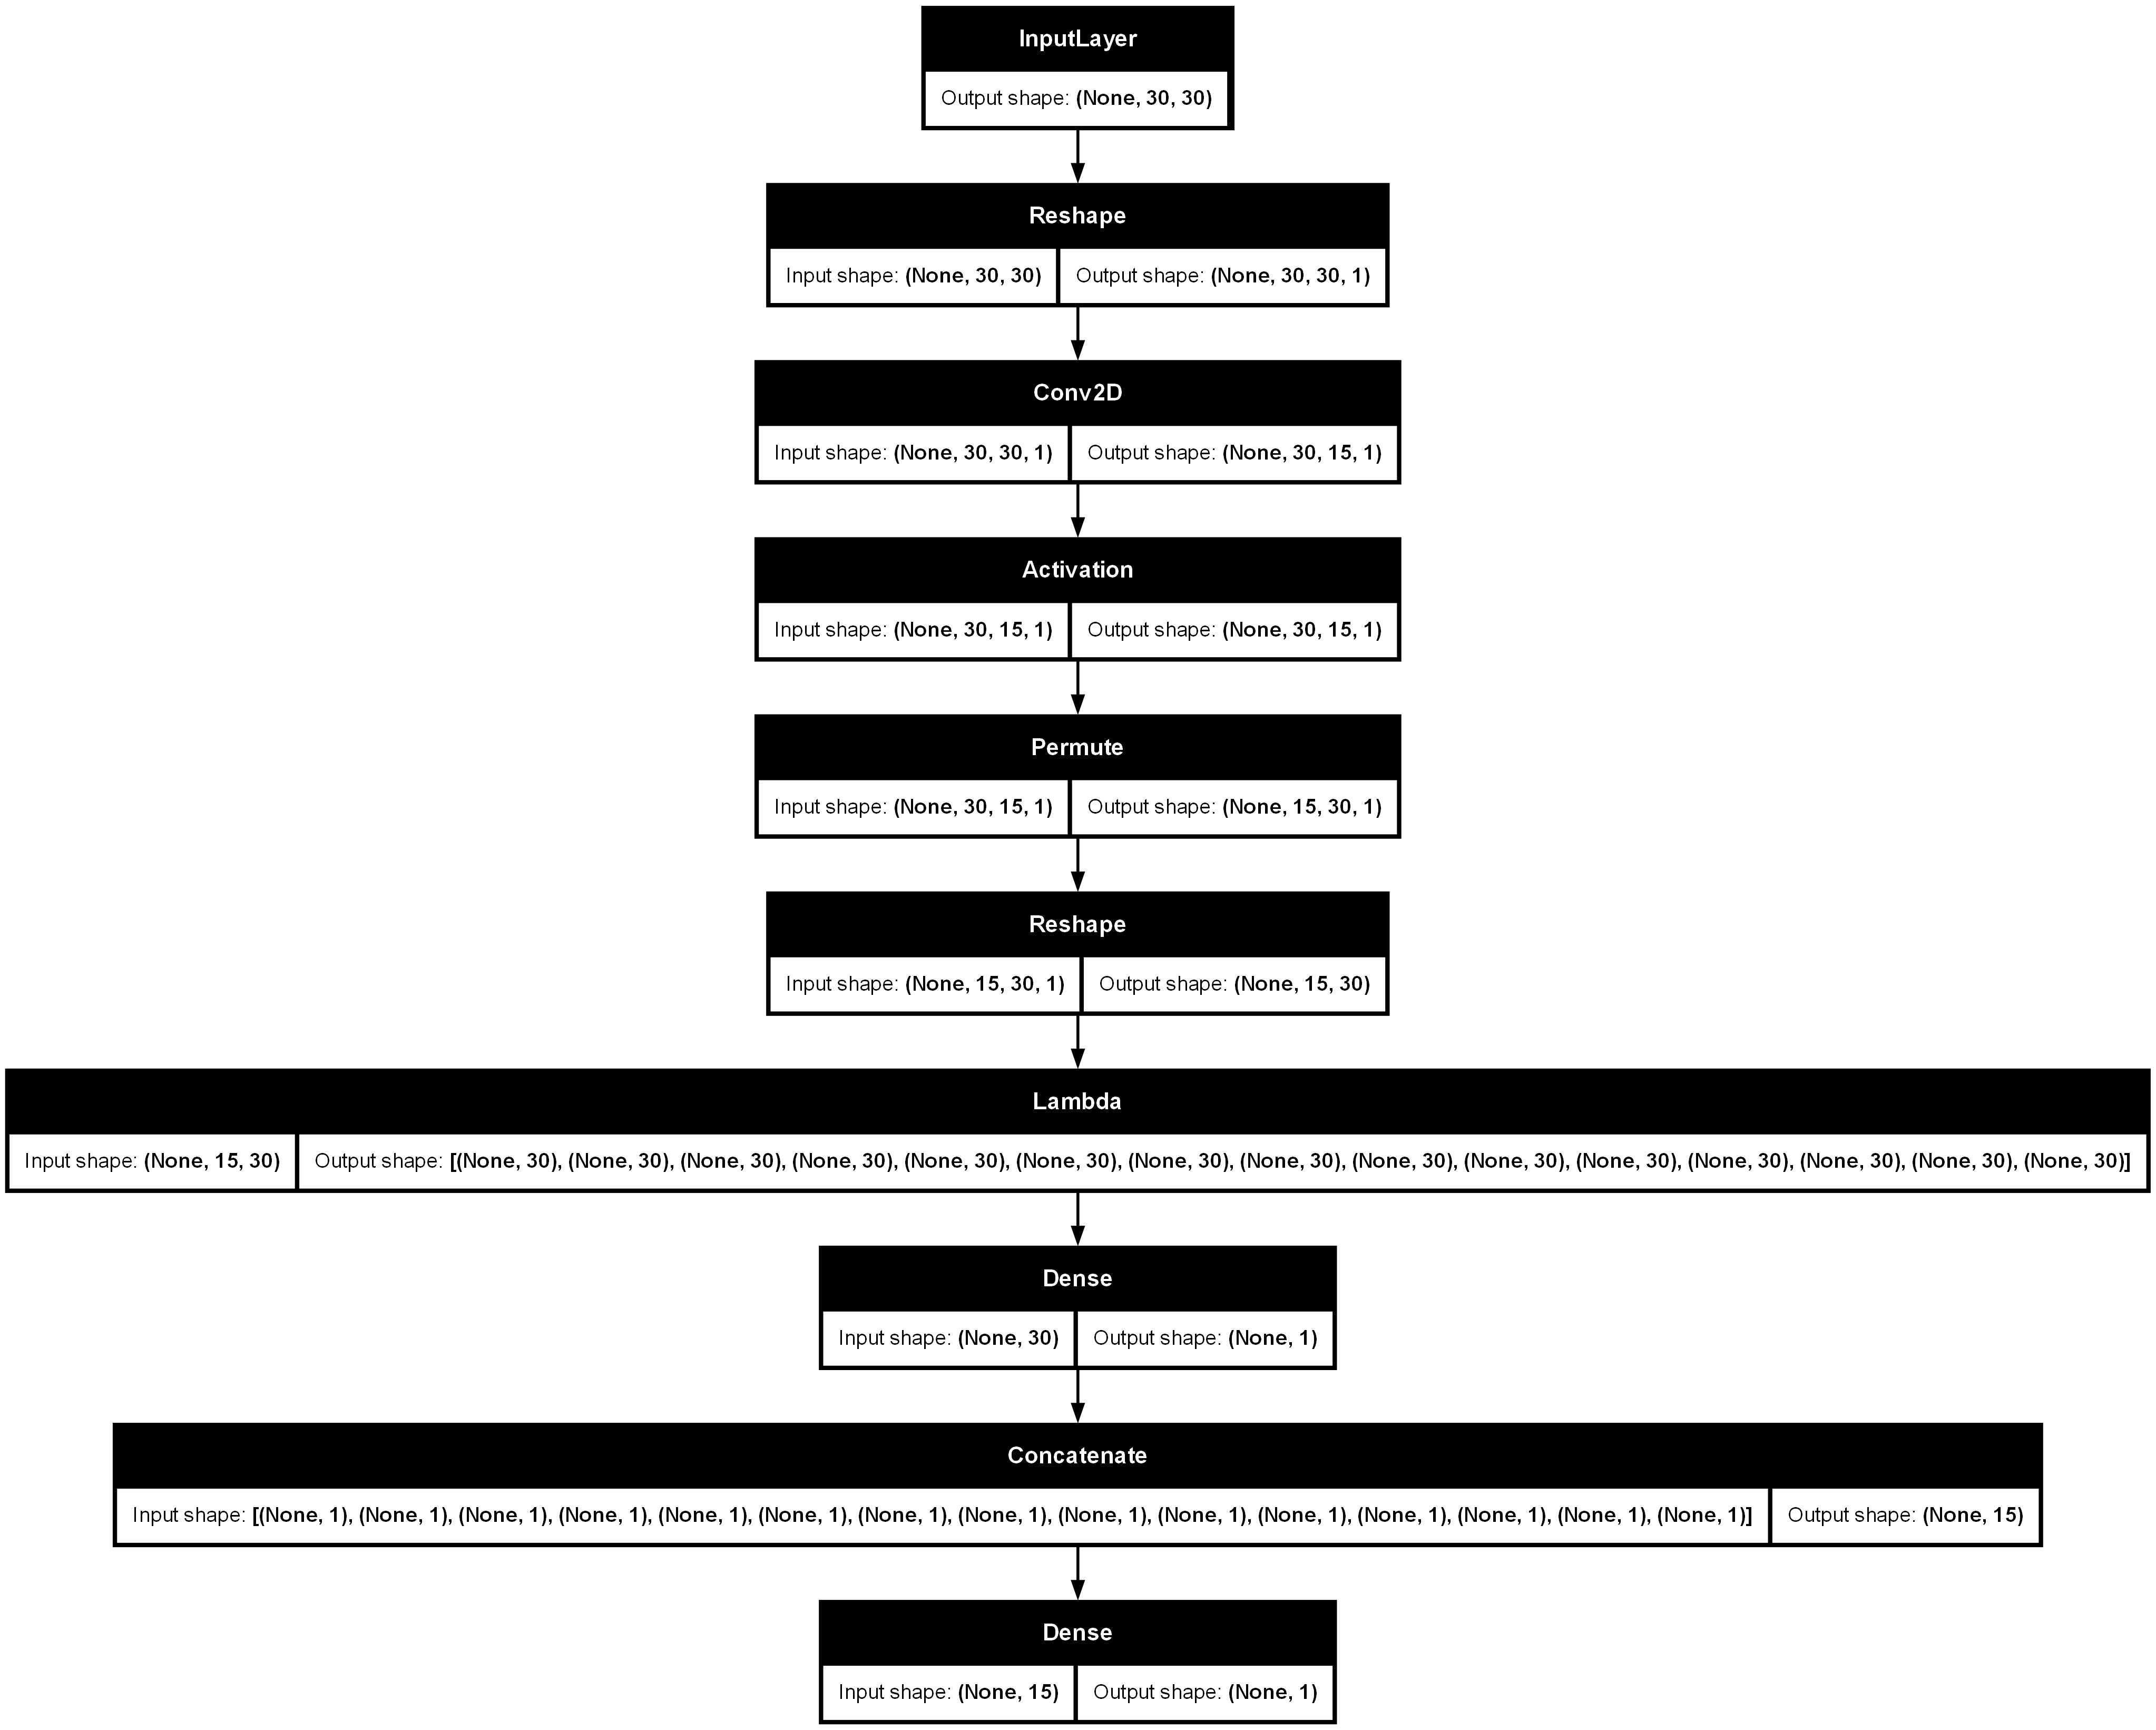

In [23]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
incep = tf.keras.applications.InceptionV3(input_shape=(75, 75, 3), weights=None)

tf.keras.utils.plot_model(incep, show_shapes=True, show_layer_names=True, to_file="inception.png")

In [5]:
inp = tf.keras.layers.Input((30, 30))
x = tf.keras.layers.Reshape((30, 30, 1))(inp)

# Conv layer 1 with L2 regularization
conv1 = tf.keras.layers.Conv2D(16, kernel_size=(1,2), strides=(1,2))(x)
conv1 = tf.keras.layers.Activation('relu')(conv1)
conv1 = tf.keras.layers.Dropout(0.5)(conv1)  # Dropout after conv1

# Conv layer 2 with L2 regularization
conv2 = tf.keras.layers.Conv2D(16, kernel_size=(2,1), strides=(2,1))(conv1)
conv2 = tf.keras.layers.Activation('relu')(conv2)
conv2 = tf.keras.layers.Dropout(0.5)(conv2)  # Dropout after conv2

# Conv layer 3 with L2 regularization
# Shortcut path
shortcut = tf.keras.layers.Conv2D(16, kernel_size=1, strides=1, padding="same")(conv2)
shortcut = tf.keras.layers.Activation('relu')(shortcut)

conv3 = tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, padding="same")(conv2)
conv3 = tf.keras.layers.Activation('relu')(conv3)
conv3 = tf.keras.layers.Dropout(0.5)(conv3)  # Dropout after conv3

conv4 = tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, padding="same")(conv3)
conv4 = tf.keras.layers.Activation('relu')(conv4)
conv4 = tf.keras.layers.Dropout(0.5)(conv4)  # Dropout after conv4

conv5 = tf.keras.layers.Conv2D(16, kernel_size=5, strides=1, padding="same")(conv4)
conv5 = tf.keras.layers.Activation('relu')(conv5)
conv5 = tf.keras.layers.Dropout(0.5)(conv5)  # Dropout after conv5

# Add shortcut path to the output of conv5
conv5 = tf.keras.layers.Add()([conv5, shortcut])

full = tf.keras.layers.GlobalAveragePooling2D()(conv5)

# Dense layer with L2 regularization
out = tf.keras.layers.Dense(1, activation='sigmoid')(full)

cnn4 = tf.keras.models.Model(inputs=inp, outputs=out)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn4.compile(loss="binary_crossentropy",
             optimizer=optimizer,
             metrics=['accuracy'])
cnn4.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 30, 30)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 30, 30, 1) │          0 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 30, 15,    │         48 │ reshape_2[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_12       │ (None, 30, 15,    │          0 │ conv2d_12[0][0]   │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 15, 15,    │        528 │ activation_12[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_13       │ (None, 15, 15,    │          0 │ conv2d_13[0][0]   │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 15, 15,    │      6,416 │ activation_13[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 15, 15,    │          0 │ conv2d_15[0][0]   │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 15, 15,    │      6,416 │ activation_15[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 15, 15,    │          0 │ conv2d_16[0][0]   │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 15, 15,    │      6,416 │ activation_16[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 15, 15,    │        272 │ activation_13[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 15, 15,    │          0 │ conv2d_17[0][0]   │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_14       │ (None, 15, 15,    │          0 │ conv2d_14[0][0]   │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 15, 15,    │          0 │ activation_17[0]… │
│                     │ 16)               │            │ activation_14[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 16)        │          0 │ add_2[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         17 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 20,113 (78.57 KB)

 Trainable params: 20,113 (78.57 KB)

 Non-trainable params: 0 (0.00 B)

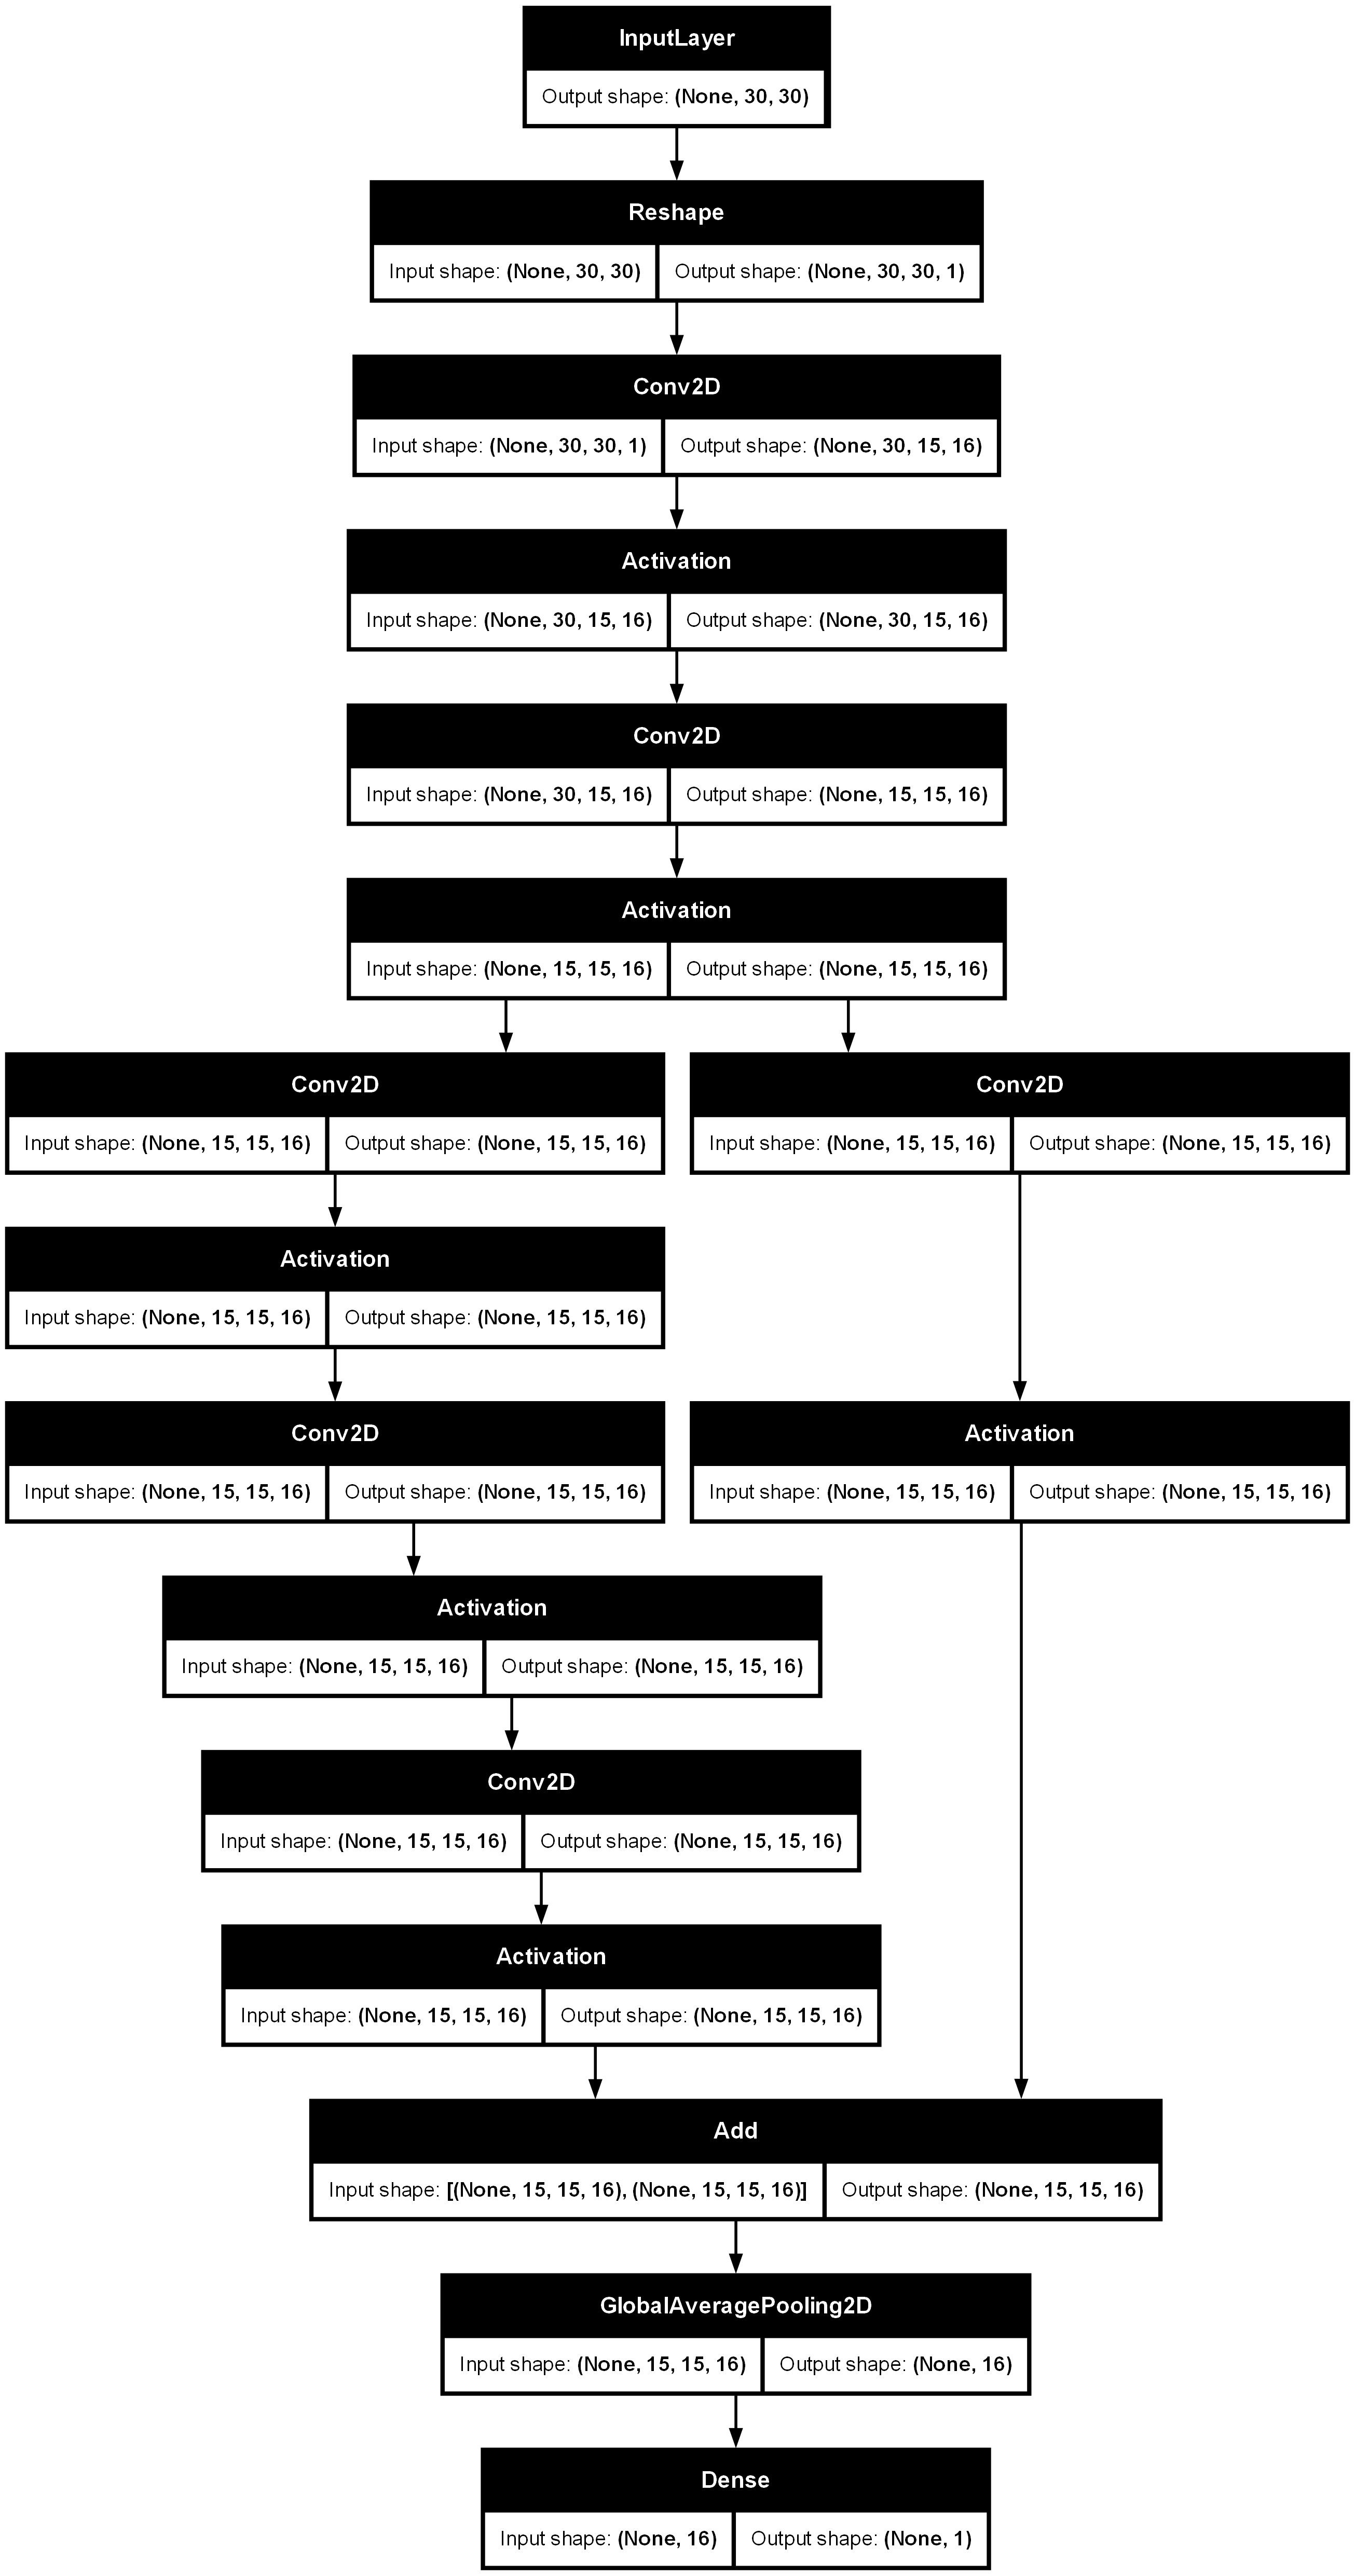

In [6]:
tf.keras.utils.plot_model(cnn4, show_shapes=True)

In [ ]:
cnn4.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


In [10]:
conv1 = model.get_layer(name="conv2d")

new_model = tf.keras.models.Model(inputs=model.inputs, outputs=conv1.output)

new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1CLONE             │ (None, 30, 30, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 15, 30, 16)     │            48 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48 (192.00 B)

 Trainable params: 48 (192.00 B)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Define a model that outputs activations for specific layers
ixs = range(7)  # Indices of layers you want to visualize
outputs = [model.layers[i + 1].output for i in ixs]
new_model = tf.keras.Model(inputs=model.inputs, outputs=outputs)
new_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_1CLONE             │ (None, 30, 30, 1)      │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 15, 30, 16)     │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 15, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 15, 15, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,009 (27.38 KB)

 Trainable params: 7,009 (27.38 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
df = pd.read_csv(r"G:\My Drive\centroset\set30.5\normal-1-s0-7.csv", index_col=0)

x = fill_square(df.values, 30)
x.shape

(30, 30)

In [7]:
feat_map = new_model(x.reshape(1, 30, 30, 1))
len(feat_map)

d:\Python\sinar-backend\.venv\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_1CLONE']. Received: the structure of inputs=*
  warnings.warn(


10

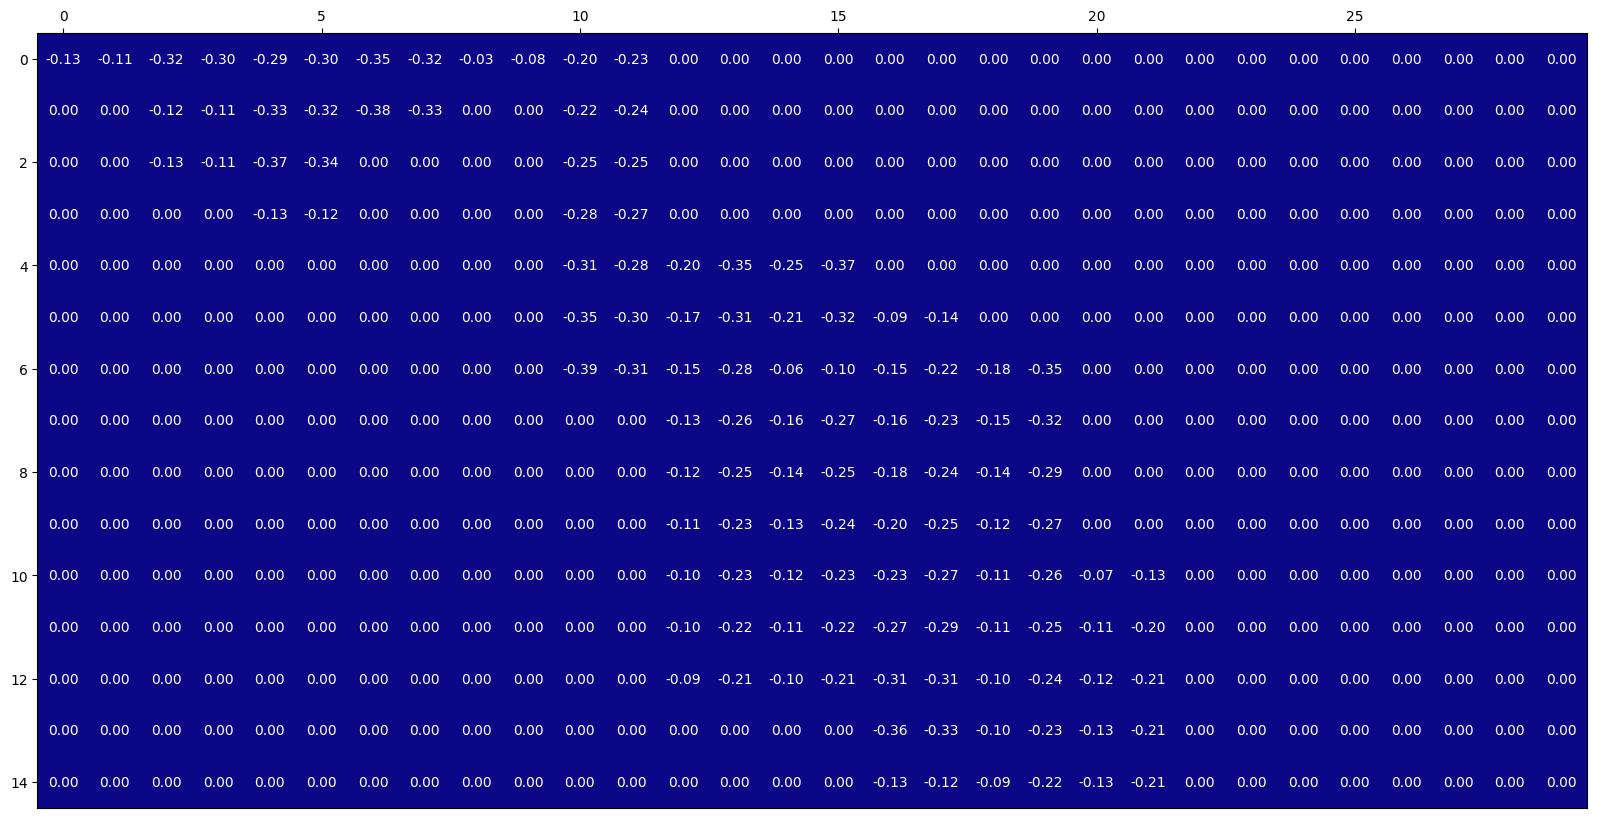

In [13]:
matrix = new_model(x.reshape(1, 30, 30, 1))[0, :, :, 0].numpy()
fig, ax = plt.subplots(figsize=(20, 20))
# Show the image
cax = ax.imshow(matrix, cmap='plasma', vmin=0, vmax=1)

# Annotate each cell with its value
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, f'{matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Move x-axis to the top
ax.xaxis.tick_top()

# # Show all ticks from 1 to 30 on both axes
# ax.set_xticks(np.arange(30))
# ax.set_yticks(np.arange(30))

# # Set tick labels to range from 1 to 30
# ax.set_xticklabels(np.array([f"{xy}{i}" for i in range(1, 16) for xy in ['x', 'y']]))
# ax.set_yticklabels(np.arange(0, 150, 5))
plt.show()

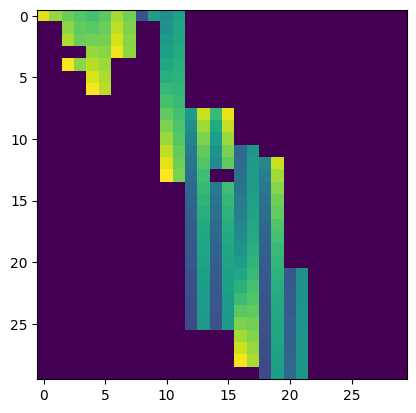

In [8]:
plt.imshow(x)

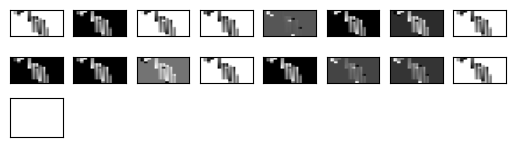

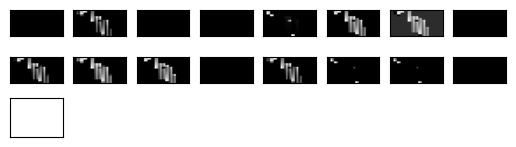

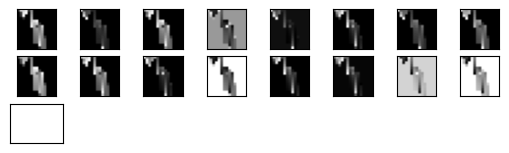

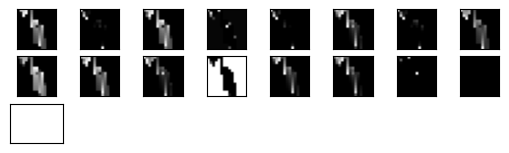

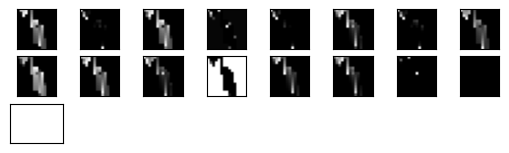

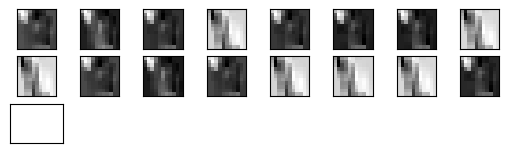

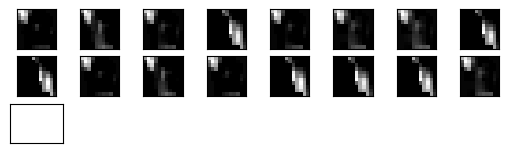

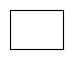

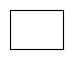

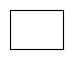

In [9]:
# visualize feature maps
for i, fmap in enumerate(feat_map):
    # plot all 64 maps in an 8x8 squares
    n = 8
    ix = 1
    for _ in range(n):
        for _ in range(n):
            # specify subplot and turn of axis
            ax = plt.subplot(n, n, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            try:
                plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
            except:
                continue
            ix += 1
    # show the figure
    plt.show()